**ogs@jupyter-lab: C process: Cs Transport-sorption Process**

<table><tr>
<td> <img src="../ogs-workflows.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="../icross-logo-ok.png" alt="Drawing" style="width: 100px;"/> </td>
</tr></table>

**Model #1: Chemical calculations by calling Phreeqc during the runtime**

Total simulation time is about 21 hrs. on a single CPU core (Intel(R) Xeon(R) @ 2.40GHz). Therefore, simulation is completed externally and only the results are shown. To obtain the results, please run the file `caesium_phreeqc/caesium.prj`. 

>>> print results <<<
./caesium_phreeqc/results/out.pvd


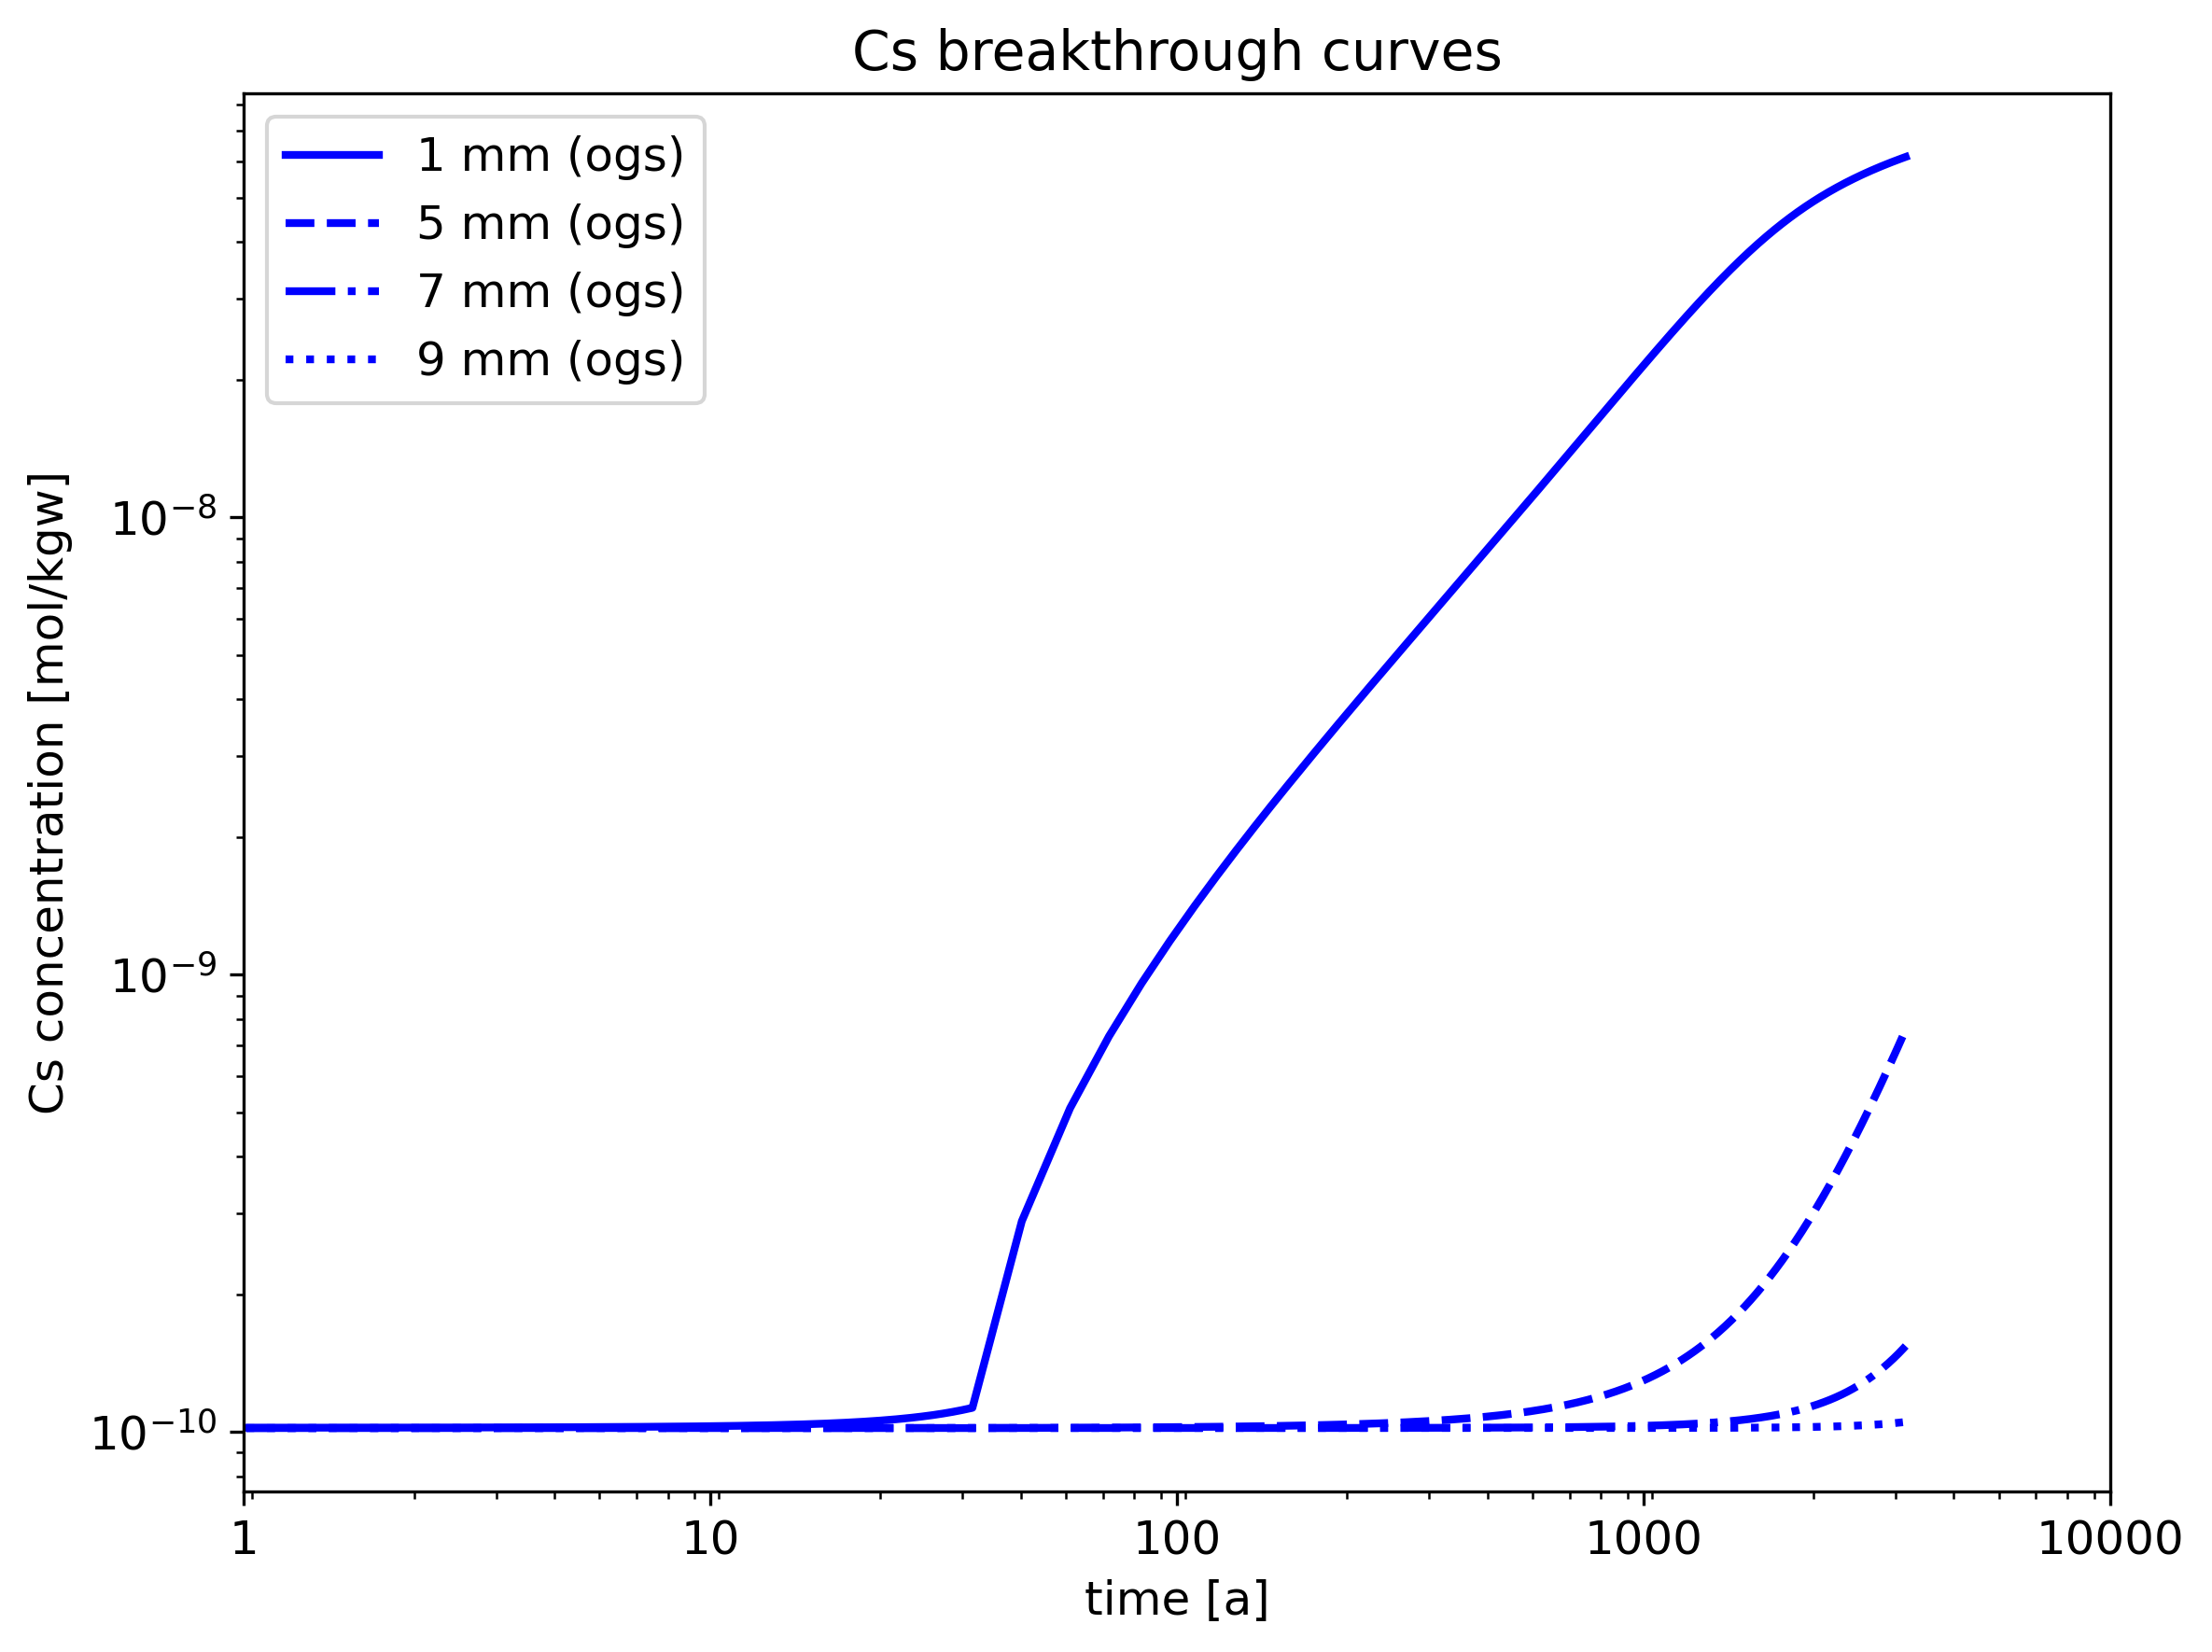

In [4]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.style.use('../notebook.mplstyle')
print("=====================")
print(">>> print results <<<")

pvdfile = vtuIO.PVDIO("./caesium_phreeqc/results/out.pvd", dim=1)

component = 'Cs'
points={'pt0': (0.00101818,0.0,0.0), 'pt1': (0.00509091,0.0,0.0), 'pt2': (0.00701414,0.0,0.0), 'pt3': (0.00905051,0.0,0.0)}
time = pvdfile.timesteps
Cs_breakthrough = pvdfile.read_time_series(component, points)

plt.plot(time, Cs_breakthrough["pt0"], "b-", label="1 mm (ogs)")
plt.plot(time, Cs_breakthrough["pt1"], "b--", label="5 mm (ogs)")
plt.plot(time, Cs_breakthrough["pt2"], "b-.", label="7 mm (ogs)")
plt.plot(time, Cs_breakthrough["pt3"], "b:", label="9 mm (ogs)")


# add extracted Flotran breakthrough curve
# data_flotran_1mm = pd.read_csv("Flotran_1mm.csv", names=['a', 'Concentration'])
# data_flotran_1mm.sort_values('a', inplace=True)
# data_flotran_1mm['s'] = data_flotran_1mm['a']*24*3600
# plt.plot(data_flotran_1mm['s'], data_flotran_1mm['Concentration'], color='green', label="1 mm (Flotran - extracted from paper)")

plt.xscale('log')
plt.xlim(86400, 86400*10000)
plt.yscale('log')
# plt.ylim(1e-11, 1e-6)
titlestring="{} breakthrough curves".format(component)
plt.title(titlestring)
plt.xlabel('time [a]')
x_labels = [1, 10, 100, 1000, 10000]
x_ticks = [86400, 864000, 8640000, 86400000, 864000000]
plt.xticks(x_ticks, x_labels)

plt.ylabel('{} concentration [mol/kgw]'.format(component))
plt.legend()
plt.tight_layout()
plt.savefig("{}.png".format(titlestring), dpi=70)
plt.show()

**OGS links**
- notebook draft by OK: https://github.com/OlafKolditz/ogs-jupyter-lab

**Credits**
- Jaime Garibay-Rodriguez for this benchmark set up
- Jörg Buchwald for ogs6py and VTUInterface (https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc)
- Frameworks acknowledgements: OGS, Python, Jupyter, matplotlib